# Tarea 5
**Alumno:** Mario Rordríguez Félix

**Materia:** Matemáticas para ciencia de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 1
### Se tiene la siguiente tabla con información

In [2]:
data = pd.DataFrame(
    {
        "n": [100_000, 200_000, 300_000, 400_000],
        "k": [1, 2, 3, 4],
        "CPU_time": [0.05, 0.09, 0.13, 0.18],
        "yn": [9.9181, 10.549, 10.919, 11.183],
    }
)
data

,n,k,CPU_time,yn
0,100000,1,0.05,9.9181
1,200000,2,0.09,10.5490
2,300000,3,0.13,10.9190
3,400000,4,0.18,11.1830


Donde el tiempo de CPU se puede modelar mediante la siguiente aproximación $$ c(n) = \alpha + \beta n $$

### a) Utilice los datos de la tabla para determinar α y β por el método de mínimos cuadrados.

Al modelar la paroximación medinate una función lineal por el método de mínimos cuadrados ordinarios se tiene que
$$ F(\alpha, \beta) = \sum_{i=1}^{k}(\alpha + \beta ni - ci)^2 $$
Al minimizar $F$ con respecto de $\alpha$ y $\beta$ se debe cumplir la siguiente condición
$$ \frac{\delta F}{\delta \alpha} = \frac{\delta F}{\delta \beta} = 0 $$
A partir de lo cual se obtiene:

$$ \begin{pmatrix}
k & \sum_{i=1}^{k} n_i \\
\sum_{i=1}^{k} n_i & \sum_{i=1}^{k} n_i^2
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^{k} c_i \\
\sum_{i=1}^{k} n_i c_i
\end{pmatrix}.
$$

Que es un sistema de ecuaciones lineales de 2x2. Al sustituir los valores en las matrices se obtiene:

$$ k=4, \quad \sum_{i=1}^{k} n_i = 1,000,000, \quad \sum_{i=1}^{k} n_i^2 = 300,000,000,000 $$
$$ \sum_{i=1}^{k} c_i = 0.45, \quad  \sum_{i=1}^{k} n_i c_i = 134,000 $$

Por lo tanto

$$ \begin{pmatrix}
4 & 1,000,000 \\
1,000,000 & 300,000,000,000
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
=
\begin{pmatrix}
0.45 \\
134,000
\end{pmatrix}.
$$

Se tiene un sistema de ecuaciones del tipo
$$ Ax = b $$
Que se resuelve al multiplicar la inversa de A en ambos lados de la igualdad
$$ A^{-1}Ax = A^{-1}b $$
y dado que $ A^{-1}A = I $ donde $I=matriz identidad$ y $Ix = x$ el resultado sería
$$ x = A^{-1}b $$


In [3]:
# Se define la matriz A
A = np.array([[4, 1_000_000], [1_000_000, 300_000_000_000]])
# Se calcula la inversa
A_inversa = np.linalg.inv(A)
# Se define el vector b
b = np.array([[0.45], [134_000]])

# Se calcula la solución del sistema al multiplicar la inversa de A por b
np.linalg.matmul(A_inversa, b)

array([[5.0e-03],
       [4.3e-07]])

El resultado del sistema de ecuaciones es:
$$ \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
=
\begin{pmatrix}
0.005 \\
0.00000043
\end{pmatrix} $$

Por lo que tenemos una ecuación lineal de la siguiente manera:
$$ c(n) = 0.005 + 0.00000043n $$

### b) Estime el tiempo de CPU necesario en los casos de $n = 10^{6}$ y $n= 10^{7}$

In [4]:
# Se crea una función para aproximar el tiempo del CPU
def cpu_time_aprox_lineal(n):
    return 0.005 + (0.00000043 * n)

In [5]:
n1 = 10**6
cpu_t1 = cpu_time_aprox_lineal(n1)
print(f"El tiempo de la CPU cuando n = 10^6 es: {cpu_t1}")


n2 = 10**7
cpu_t2 = cpu_time_aprox_lineal(n2)
print(f"El tiempo de la CPU cuando n = 10^7 es: {cpu_t2}")

El tiempo de la CPU cuando n = 10^6 es: 0.435
El tiempo de la CPU cuando n = 10^7 es: 4.305


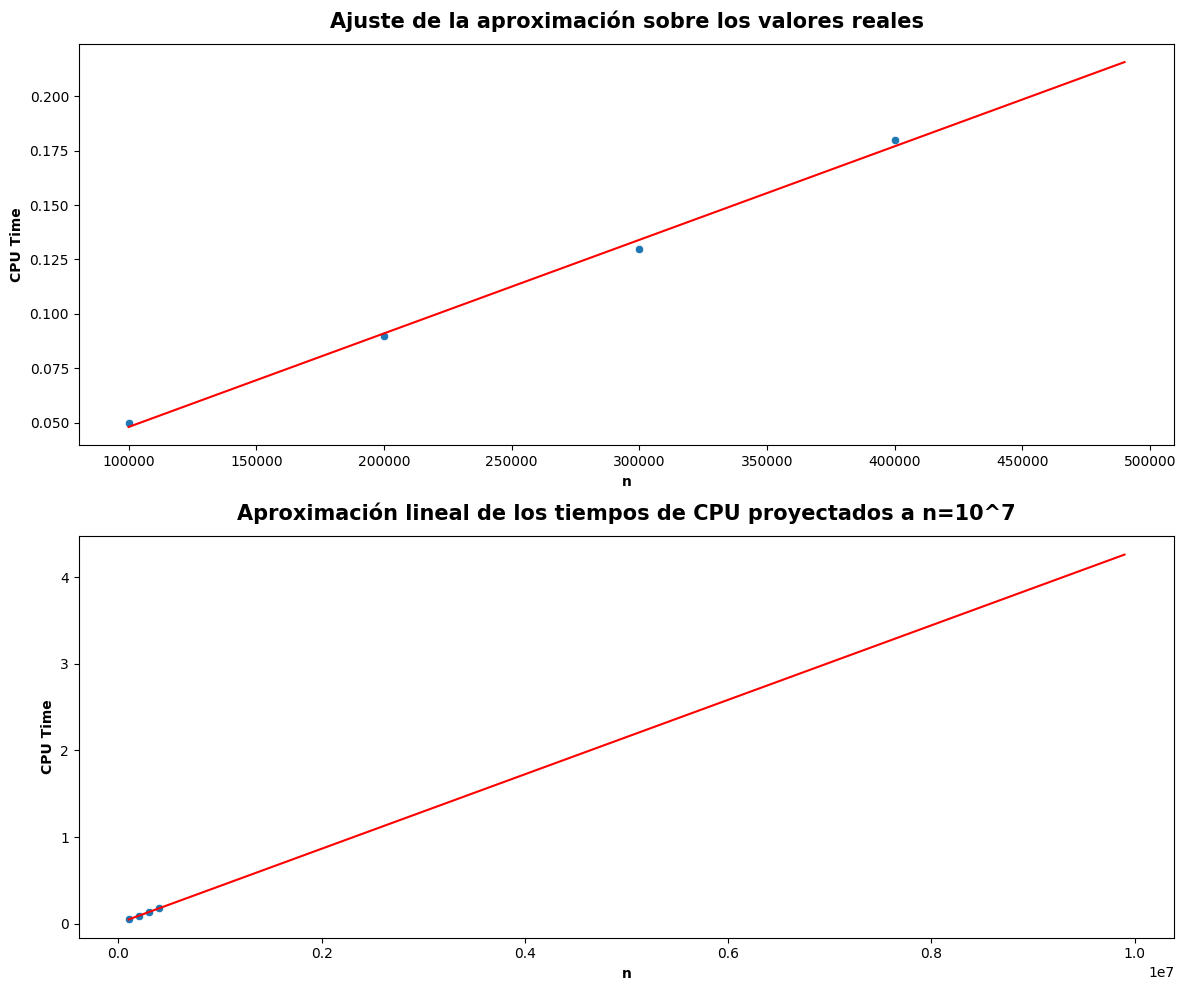

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 10))
# Se generan datos para graficar la aproximación lineal
x1 = np.arange(100_000, 500_000, 10_000)
y1 = cpu_time_aprox_lineal(x1)
sns.scatterplot(x=data.n, y=data["CPU_time"], ax=ax[0])
sns.lineplot(x=x1, y=y1, color="red", ax=ax[0])
ax[0].set_title(
    "Ajuste de la aproximación sobre los valores reales",
    fontsize=15,
    fontweight="bold",
    y=1.02,
)

ax[0].set_xlabel("n", fontsize=10, fontweight="bold")

ax[0].set_ylabel("CPU Time", fontsize=10, fontweight="bold")


x2 = np.arange(100_000, 10_000_000, 100_000)
y2 = cpu_time_aprox_lineal(x2)
sns.scatterplot(x=data.n, y=data["CPU_time"], ax=ax[1])
sns.lineplot(x=x2, y=y2, color="red", ax=ax[1])
ax[1].set_title(
    "Aproximación lineal de los tiempos de CPU proyectados a n=10^7",
    fontsize=15,
    fontweight="bold",
    y=1.02,
)
ax[1].set_xlabel("n", fontsize=10, fontweight="bold")
ax[1].set_ylabel("CPU Time", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

# Ejercicio 2

En este ejercicio se realizará un análisis de las temperaturas anuales promedio del estado de michoacán en el periodo 1985-2023.

Se realizarán dos aproximaciones sobre los datos históricos: una estimación lineal y una cuadrática.

In [7]:
# Los datos son los siguientes
data_temperatura = pd.read_csv("./datos_tarea5.csv")
data_temperatura.head()

,entidad,anio,t,temperatura
0,Michocán,1985,1,20.0
1,Michocán,1986,2,19.6
2,Michocán,1987,3,19.9
3,Michocán,1988,4,19.8
4,Michocán,1989,5,19.8


In [8]:
# Se tienen un total de 39 datos
len(data_temperatura.t)

39

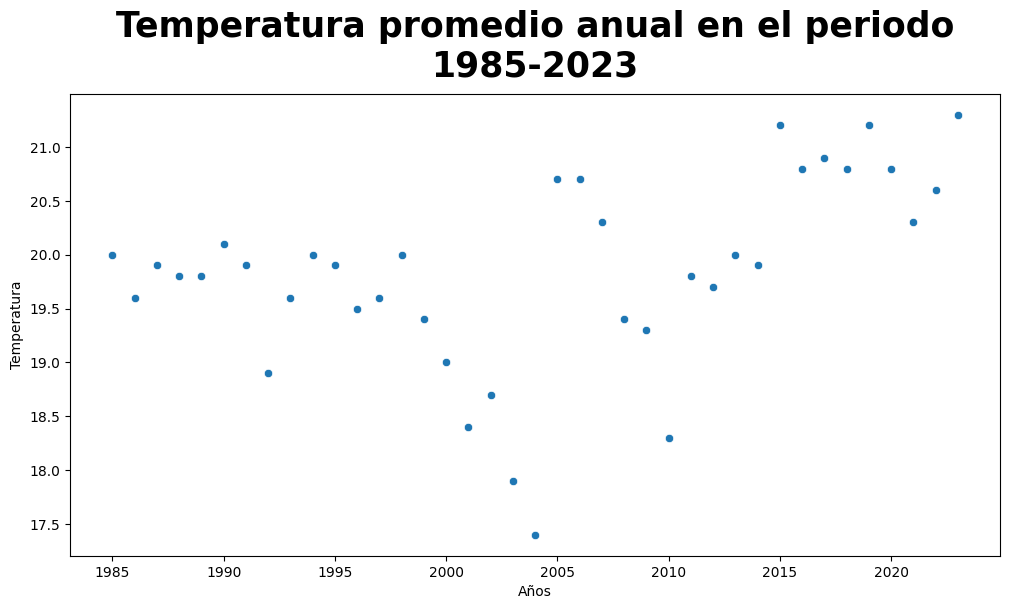

In [9]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_temperatura.anio, y=data_temperatura.temperatura)
plt.title(
    "Temperatura promedio anual en el periodo\n1985-2023",
    fontsize=25,
    fontweight="bold",
    y=1.02,
)
plt.xlabel("Años")
plt.ylabel("Temperatura")
plt.show()

### Aproximación por una función lineal
Para haer la aproximación lineal se usará el mismo sistema de ecuaciones utilizado en la sección anterior
$$ \begin{pmatrix}
n & \sum_{i=1}^{n} t_i \\
\sum_{i=1}^{n} t_i & \sum_{i=1}^{n} t_i^2
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} t_i y_i
\end{pmatrix}
$$

En este caso los valores son:
$$ n=39, \quad \sum_{i=1}^{n} t_i = 780, \quad \sum_{i=1}^{n} t_i^2 = 20,540 $$
$$ \sum_{i=1}^{n} y_i = 773.4, \quad  \sum_{i=1}^{n} t_i y_i = 15,624 $$

Por lo tanto

$$ \begin{pmatrix}
39 & 780 \\
780 & 20,540
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
=
\begin{pmatrix}
773.4 \\
15,624
\end{pmatrix}.
$$

In [10]:
# Nuevamente declaramos las matrices del sistema de ecuaciones
A2 = np.array([[39, 780], [780, 20_540]])

A2_inversa = np.linalg.inv(A2)

b = np.array([[773.4], [15_624]])

np.linalg.matmul(A2_inversa, b)

array([[19.19919028],
       [ 0.03157895]])

Por lo tanto los valores de alpha y beta son:
$$\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}
=
\begin{pmatrix}
19.199 \\
0.0315
\end{pmatrix}
$$

Y se tiene la ecuación lineal que aproxima los valores de yi en el tiempo ti:
$$ p(t) =  19.199 + 0.0315 t$$

In [11]:
# Se genera una función que calcula la aproximación para cada valor de ti
def temperatura_aproximación_lineal(t):
    return 19.199 + 0.0315 * t

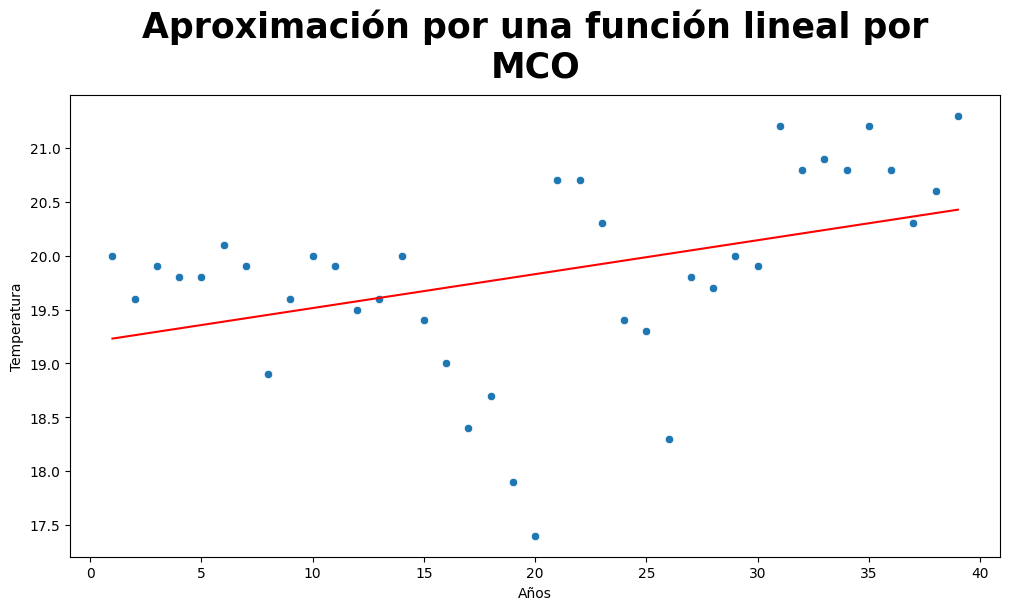

In [12]:
x_temp_lineal = np.arange(1, 40, 1)
y_temp_lineal = temperatura_aproximación_lineal(x_temp_lineal)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_temperatura.t, y=data_temperatura.temperatura)
sns.lineplot(x=x_temp_lineal, y=y_temp_lineal, color="red")
plt.title(
    "Aproximación por una función lineal por\nMCO",
    fontsize=25,
    fontweight="bold",
    y=1.02,
)
plt.xlabel("Años")
plt.ylabel("Temperatura")
plt.show()

### Aproximación por una función cuadrática
En este caso, se quiere hace una aproximación del tipo
$$ p(t) = \alpha + \beta{t} + \gamma{t^2} $$
Mediante mínimos cuadrados ordinarios lo que se busca es minimizar
$$ F(\alpha, \beta, \gamma) = \sum_{i=1}^{n} (\alpha + \beta{t_{i}} + \gamma{t_{i}^2} - y_{i})^2 $$
con respecto de sus parámetros, por lo que se debe cumplir la condición de:
$$ \frac{\delta{F}}{\delta{\alpha}} = \frac{\delta{F}}{\delta{\beta}} = \frac{\delta{F}}{\delta{\gamma}} = 0 $$

Lo cual lleva al siguiente sistema de ecuaciones lineales de 3x3
$$
\begin{pmatrix}
n & \sum_{i=1}^{n} t_i & \sum_{i=1}^{n} t_i^2 \\
\sum_{i=1}^{n} t_i & \sum_{i=1}^{n} t_i^2 & \sum_{i=1}^{n} t_i^3 \\
\sum_{i=1}^{n} t_i^2 & \sum_{i=1}^{n} t_i^3 & \sum_{i=1}^{n} t_i^4
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta \\
\gamma
\end{pmatrix}
=
\begin{pmatrix}
\sum_{i=1}^{n} y_i \\
\sum_{i=1}^{n} y_i t_i \\
\sum_{i=1}^{n} y_i t_i^2
\end{pmatrix}
$$

En este caso los valores son:
$$ n=39, \quad \sum_{i=1}^{n} t_i = 780, \quad \sum_{i=1}^{n} t_i^2 = 20,540, \quad \sum_{i=1}^{n} t_i^3 = 608,400, \quad \sum_{i=1}^{n} t_i^4 = 19,221,332 $$
$$ \sum_{i=1}^{n} y_i = 773.4 \quad \sum_{i=1}^{n} y_i t_i = 15,624 \quad \sum_{i=1}^{n} y_i t_i^2 = 415,502.2 $$

Sustituyendo los valores se tiene:
$$
\begin{pmatrix}
39 & 780 & 20,540 \\
780 & 20,540 & 608,400 \\
20,540 & 608,400 & 19,221,332
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta \\
\gamma
\end{pmatrix}
=
\begin{pmatrix}
773.4 \\
15,624 \\
415,502.2
\end{pmatrix}
$$


In [13]:
A3 = np.array([[39, 780, 20_540],
               [780, 20_540, 608_400],
               [20_540, 608_400, 19_221_332]])

A3_inversa = np.linalg.inv(A3)

b = np.array([[773.4],
              [15_624],
              [415_502.2]])

np.linalg.matmul(A3_inversa, b)

array([[ 2.02595908e+01],
       [-1.23601611e-01],
       [ 3.87951396e-03]])

Al resolver el sistema de ecuaciones se obtiene:
$$
\begin{pmatrix}
\alpha \\
\beta \\
\gamma
\end{pmatrix}
=
\begin{pmatrix}
20.2596 \\
-0.1236\\
0.00388
\end{pmatrix}
$$
Y por lo tanto la ecuación cuadrática que de la siguiente manera:
$$ p(t) = 20.2596 - 0.1236{t} + 0.00388{t^2} $$

In [14]:
# Se define una función para calcular la aproximación
# mediante la ecuación cuadrática
def temperatura_aproximación_cuadratica(t):
    return 20.2596 - (0.1236 * t) + (0.00388 * (t**2))

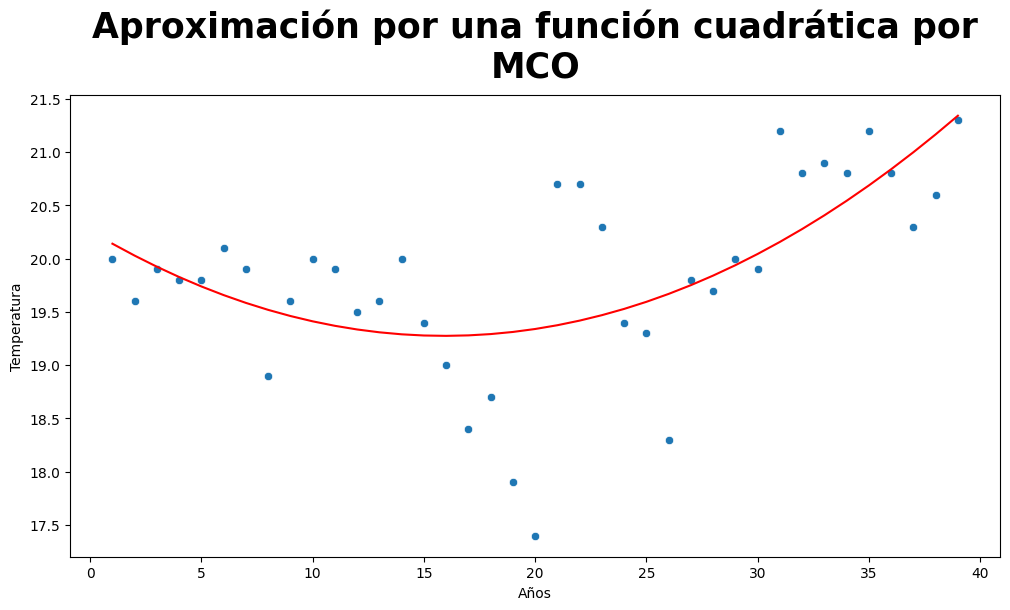

In [15]:
x_temp_cuadratica = np.arange(1, 40, 1)
y_temp_cuadratica = temperatura_aproximación_cuadratica(x_temp_cuadratica)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_temperatura.t, y=data_temperatura.temperatura)
sns.lineplot(x=x_temp_cuadratica, y=y_temp_cuadratica, color="red")
plt.title(
    "Aproximación por una función cuadrática por\nMCO",
    fontsize=25,
    fontweight="bold",
    y=1.02,
)
plt.xlabel("Años")
plt.ylabel("Temperatura")
plt.show()

# Comparación de ambas aproximaciones

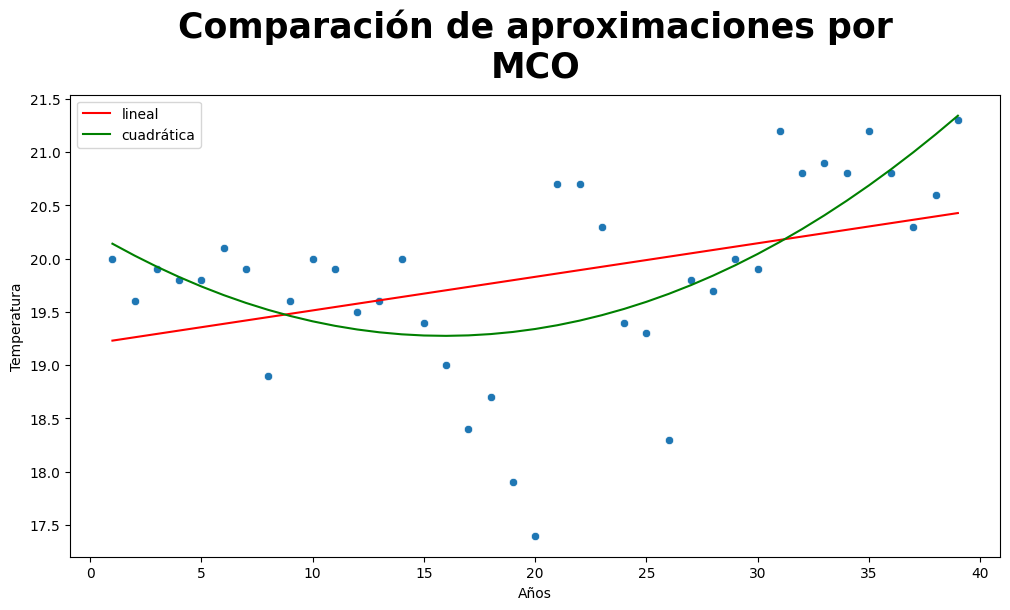

In [16]:
x_temp_lineal = np.arange(1, 40, 1)
y_temp_lineal = temperatura_aproximación_lineal(x_temp_lineal)
x_temp_cuadratica = np.arange(1, 40, 1)
y_temp_cuadratica = temperatura_aproximación_cuadratica(x_temp_cuadratica)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_temperatura.t, y=data_temperatura.temperatura)
sns.lineplot(x=x_temp_lineal, y=y_temp_lineal, color="red", label="lineal")
sns.lineplot(
    x=x_temp_cuadratica, y=y_temp_cuadratica, color="green", label="cuadrática"
)
plt.title(
    "Comparación de aproximaciones por\nMCO", fontsize=25, fontweight="bold", y=1.02
)
plt.xlabel("Años")
plt.ylabel("Temperatura")
plt.legend()
plt.show()

Para poder comparar los errores, estos serán calculados como la diferencia entre el valor observado y su aproximación correspondiente (lineal o cuadrática). Se tomará el valor absoluto de estas diferencias ya que lo que nos importa es la distancia que hay entre las aproximaciones y los valores reales.

En lo subsecuente, cuando se hable de errores, se estará haciendo referencia a estas distancias.

In [17]:
# Se crea un dataframe con los valores calculados mediante las aproximaciones
aproximaciones = pd.DataFrame(
    {
        "aprox_lineal": np.round(y_temp_lineal, 1),
        "aprox_cuadratica": np.round(y_temp_cuadratica, 1),
    }
)

# Se unen los datos de las aproximaciones al dataframe original
data_comparacion = pd.merge(
    left=data_temperatura, right=aproximaciones, on=data_temperatura.index
)

# Se calculan los valores absolutos de los errores, es decir, se obtienen
# las distancias entre los valores aproximados y los observados, sin tomar
# en cuenta su signo.
data_comparacion = data_comparacion.drop(columns=["key_0"])
data_comparacion["error_lineal"] = data_comparacion.apply(
    lambda x: np.absolute(x.temperatura - x.aprox_lineal), axis=1
)
data_comparacion["error_cuadratico"] = data_comparacion.apply(
    lambda x: np.absolute(x.temperatura - x.aprox_cuadratica), axis=1
)

data_comparacion.head()

,entidad,anio,t,temperatura,aprox_lineal,aprox_cuadratica,error_lineal,error_cuadratico
0,Michocán,1985,1,20.0,19.2,20.1,0.8,0.1
1,Michocán,1986,2,19.6,19.3,20.0,0.3,0.4
2,Michocán,1987,3,19.9,19.3,19.9,0.6,0.0
3,Michocán,1988,4,19.8,19.3,19.8,0.5,0.0
4,Michocán,1989,5,19.8,19.4,19.7,0.4,0.1


A continuación se muestra un análisis gráfico sobre el comportamiento de los errores para cada aproximación.

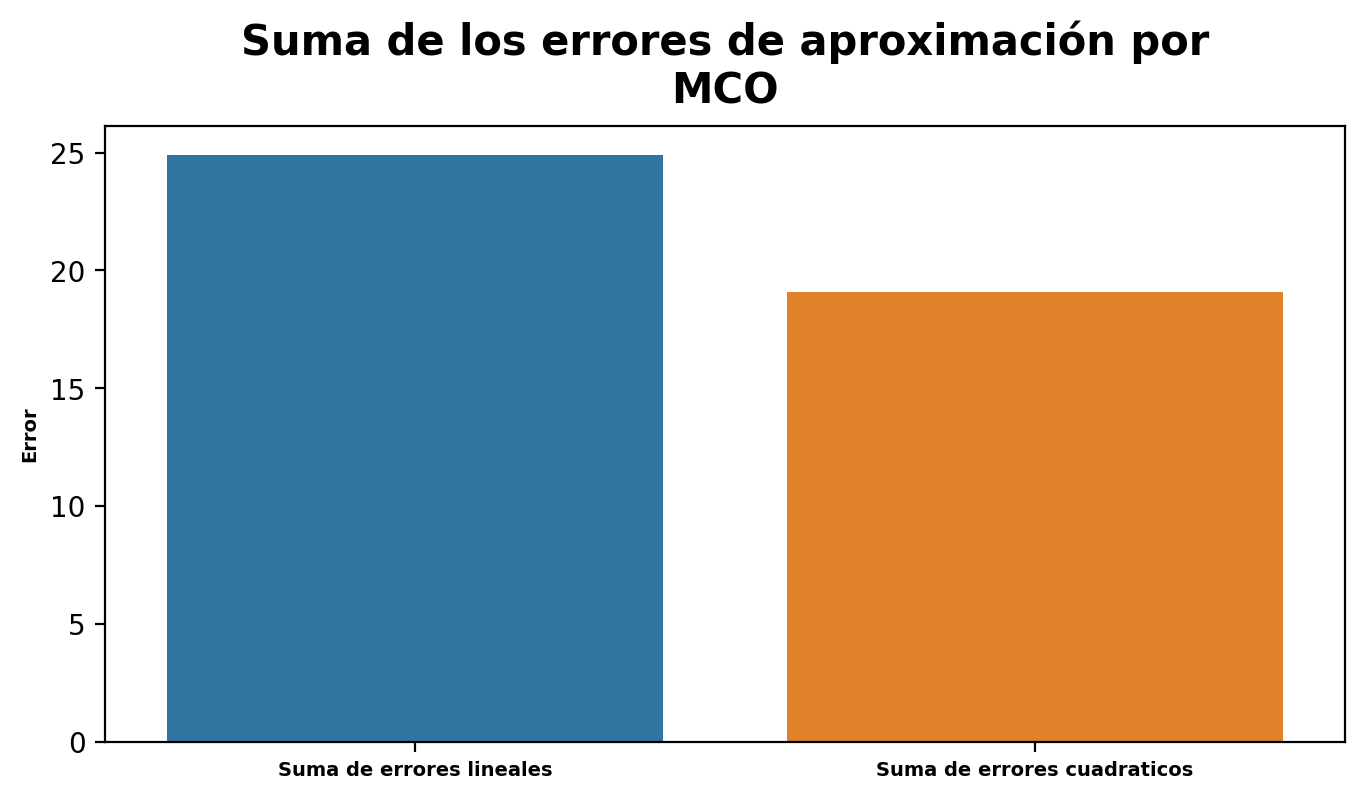

In [18]:
suma_errores_lineales = data_comparacion.error_lineal.sum()
suma_errores_cuadraticos = data_comparacion.error_cuadratico.sum()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=["Suma de errores lineales"], y=suma_errores_lineales)
sns.barplot(x=["Suma de errores cuadraticos"], y=suma_errores_cuadraticos)
plt.title(
    "Suma de los errores de aproximación por\nMCO",
    fontsize=15,
    fontweight="bold",
    y=1.01,
)
plt.ylabel(
    "Error",
    fontsize=7,
    fontweight="bold",
)
plt.xticks(
    fontsize=7,
    fontweight="bold",
)
plt.show()

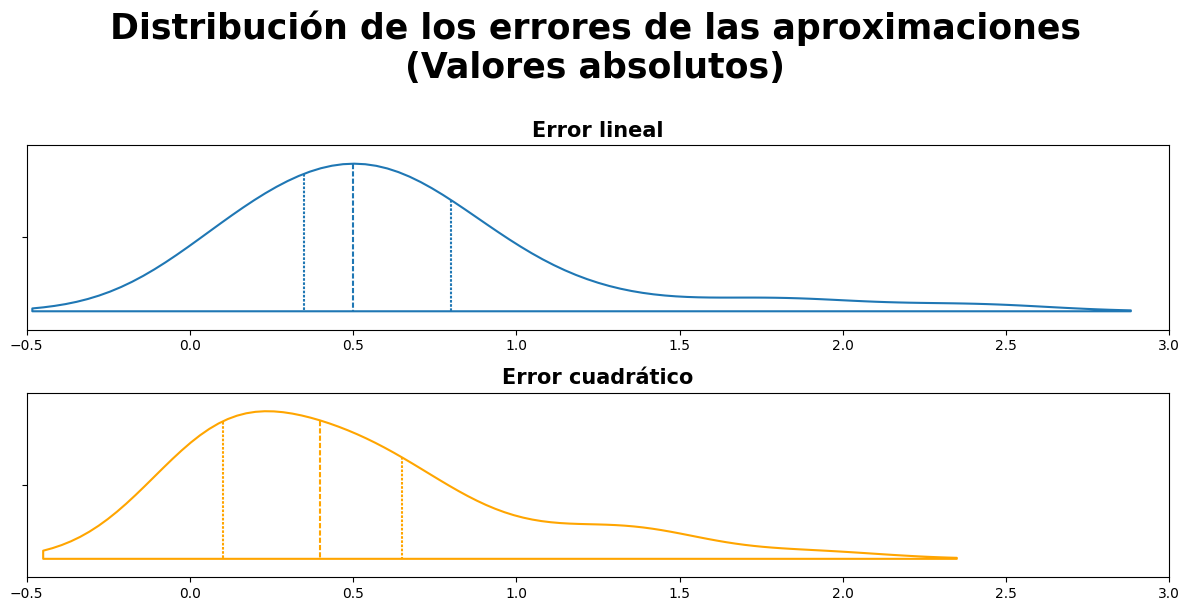

In [19]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 6))
sns.violinplot(
    data_comparacion.error_lineal,
    orient="h",
    label="error lineal",
    fill=False,
    split=True,
    inner="quart",
    ax=ax[0],
)
ax[0].set_xlim(-0.5, 3)
ax[0].set_title("Error lineal", fontsize=15, fontweight="bold")
ax[0].set_xlabel("")

sns.violinplot(
    data_comparacion.error_cuadratico,
    orient="h",
    label="error cuadratico",
    fill=False,
    split=True,
    inner="quart",
    color="orange",
    ax=ax[1],
)
ax[1].set_xlim(-0.5, 3)
ax[1].set_title("Error cuadrático", fontsize=15, fontweight="bold")
ax[1].set_xlabel("")

plt.suptitle(
    "Distribución de los errores de las aproximaciones\n(Valores absolutos)",
    fontsize=25,
    fontweight="bold",
    y=1.01,
)
plt.tight_layout()
plt.show()

Como se puede observar, a suma de los errores son más grandes en el caso de la aproximación lineal. 

La distribución de los errores muestra que la mediana de los errores para la aproximación cuadrática es menor que para la lineal y en general los errores de la aproximación cuadrática se concentran en valores más cerca del cero.

Lo anterior sugiere que la aproximación cuadrática es mejor que la lineal para hacer predicciones sobre estos datos.

# Consideraciones importantes
Si bien la aproximación cuadrática se ajusta mejor a los datos estudiados, se debe de tener cuidado cuando se quieren hacer predicciones a futuro, ya que, como se muestra en la siguiente gráfica, si se usa la aproximación cuadrática para estimar el valor de la temperatura en un rango de 100 años, se puede ver que se obtienen estimaciones poco realistas, mientras que la aproximación lineal parece brindar mejores estimaciones para estos casos.

Esto no cntradice lo asegurado anteriormente respecto a que la aproximación cuadrática es mejor que la lineal para este grupo de datos, pero esto aplica solamente para un rango de años dentro del intervalo observado. 

Si lo que se desea es hacer estimaciones hacia el futuro a partir de una aproximación, sería recomendable elegir un modelo distinto que se adecue mejor al comportamiento de la temperatura y que capture de mejor manera su comportamiento en el largo plazo.

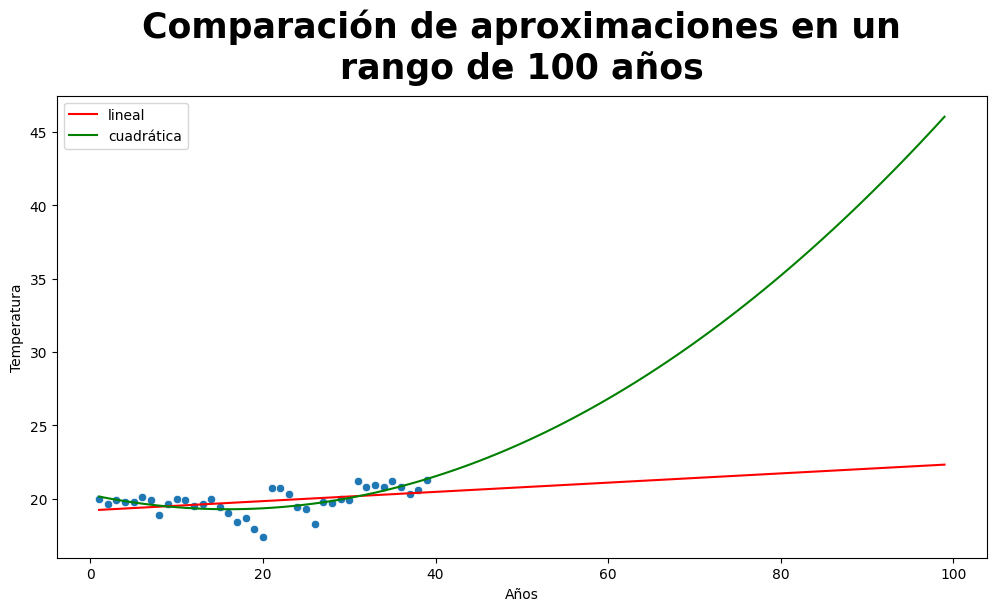

In [20]:
x_temp_lineal = np.arange(1, 100, 1)
y_temp_lineal = temperatura_aproximación_lineal(x_temp_lineal)
x_temp_cuadratica = np.arange(1, 100, 1)
y_temp_cuadratica = temperatura_aproximación_cuadratica(x_temp_cuadratica)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_temperatura.t, y=data_temperatura.temperatura)
sns.lineplot(x=x_temp_lineal, y=y_temp_lineal, color="red", label="lineal")
sns.lineplot(
    x=x_temp_cuadratica, y=y_temp_cuadratica, color="green", label="cuadrática"
)
plt.title(
    "Comparación de aproximaciones en un\nrango de 100 años",
    fontsize=25,
    fontweight="bold",
    y=1.02,
)
plt.xlabel("Años")
plt.ylabel("Temperatura")
plt.legend()
plt.show()

# Referencias
Tveito, et.al. Elements of Scientific Computing (2010)